In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
from glob import glob
audio_files = glob('speech.wav')

In [3]:
import IPython.display as ipd

ipd.Audio(audio_files[0])

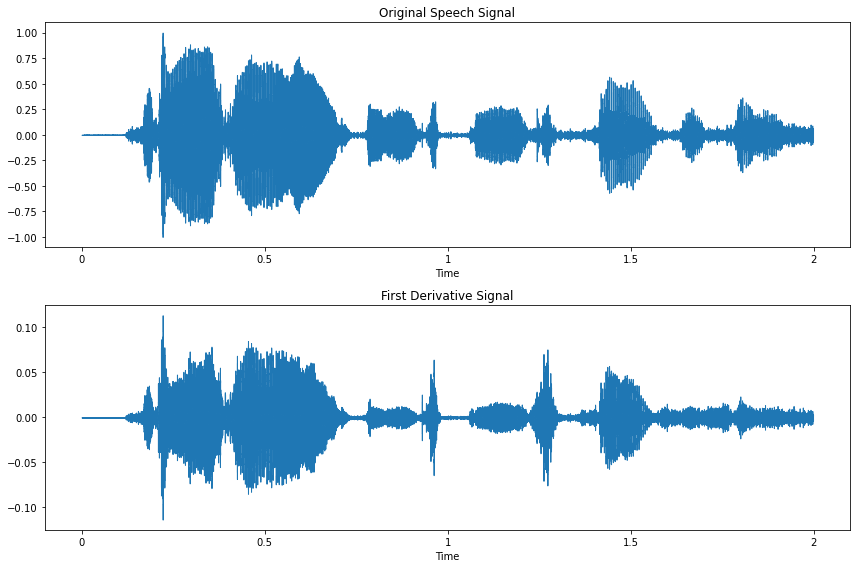

Listening to the original speech signal:
Listening to the first derivative signal:


In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Function to calculate finite difference for the first derivative
def calculate_first_derivative(signal):
    diff = np.diff(signal)
    derivative_signal = np.concatenate(([diff[0]], diff))
    return derivative_signal

# Load the speech signal using librosa
file_path = 'speech.wav'
original_signal, sr = librosa.load(file_path, sr=None)

# Calculate the first derivative
derivative_signal = calculate_first_derivative(original_signal)

# Plot and visualize the original and derivative signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(original_signal, sr=sr)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(derivative_signal, sr=sr)
plt.title('First Derivative Signal')

plt.tight_layout()
plt.show()

# Save the derivative signal to a new audio file
derivative_file_path = 'derivative_audio.wav'
sf.write(derivative_file_path, derivative_signal, sr)

# Listen to the original and derivative signals
import IPython.display as ipd
print("Listening to the original speech signal:")
#ipd.Audio(file_path)

print("Listening to the first derivative signal:")
ipd.Audio(derivative_file_path)


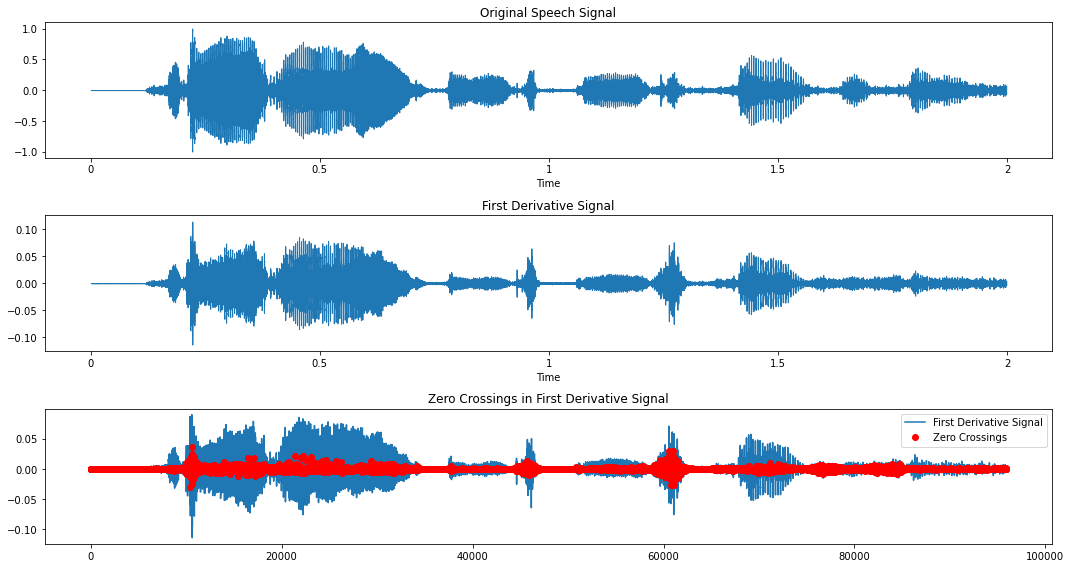

Average length between consecutive zero crossings in speech regions: 23.23776054289869
Average length between consecutive zero crossings in silence regions: 23.238972370334466


In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Function to calculate finite difference for the first derivative
def calculate_first_derivative(signal):
    diff = np.diff(signal)
    derivative_signal = np.concatenate(([diff[0]], diff))
    return derivative_signal

# Function to detect zero crossings in a signal
def zero_crossings(signal):
    return np.where(np.diff(np.sign(signal)))[0]

# Load the speech signal using librosa
file_path = 'speech.wav'
original_signal, sr = librosa.load(file_path, sr=None)

# Calculate the first derivative
derivative_signal = calculate_first_derivative(original_signal)

# Detect zero crossings in the first derivative signal
zero_crossings_indices = zero_crossings(derivative_signal)

# Plot and visualize the original signal, first derivative, and zero crossings
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
librosa.display.waveshow(original_signal, sr=sr)
plt.title('Original Speech Signal')

plt.subplot(3, 1, 2)
librosa.display.waveshow(derivative_signal, sr=sr)
plt.title('First Derivative Signal')

plt.subplot(3, 1, 3)
plt.plot(derivative_signal, label='First Derivative Signal')
plt.plot(zero_crossings_indices, derivative_signal[zero_crossings_indices], 'ro', label='Zero Crossings')
plt.title('Zero Crossings in First Derivative Signal')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the average length between consecutive zero crossings for speech and silence regions
speech_indices = zero_crossings_indices[::2]  
silence_indices = zero_crossings_indices[1::2]  

average_length_speech = np.mean(np.diff(speech_indices))
average_length_silence = np.mean(np.diff(silence_indices))

print("Average length between consecutive zero crossings in speech regions:", average_length_speech)
print("Average length between consecutive zero crossings in silence regions:", average_length_silence)


In [10]:
import librosa

def audio_length(file_path):
    signal, sr = librosa.load(file_path, sr=None)
    duration = librosa.get_duration(y=signal, sr=sr)
    return duration

my_audio_path = 'speech1.wav'
teammate_audio_path = 'speech2.wav'

my_audio_length = audio_length(my_audio_path)
teammate_audio_length = audio_length(teammate_audio_path)

print("my spoken word length:", my_audio_length, "seconds")
print("Teammate's spoken word length:", teammate_audio_length, "seconds")


my spoken word length: 1.9378333333333333 seconds
Teammate's spoken word length: 4.077833333333333 seconds


In [11]:
import librosa
import numpy as np

def get_pitch(audio_file_path):
    # Load the audio file
    y, sr = librosa.load(audio_file_path)

    # Compute the pitch using Harmonic-Percussive Source Separation
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    # Average pitch across time frames
    avg_pitch = np.mean(pitches)

    return avg_pitch

# Replace with actual file paths
question_pitch = get_pitch('q4q.wav')
statement_pitch = get_pitch('q4s.wav')

# Compare pitch characteristics
print("Pitch analysis results:")
print(f"Question average pitch: {question_pitch:.2f} Hz")
print(f"Statement average pitch: {statement_pitch:.2f} Hz")


Pitch analysis results:
Question average pitch: 15.33 Hz
Statement average pitch: 11.02 Hz
